In [1]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/finance_course/2021/lesson4')

Mounted at /content/drive


# Monte Carlo Simulation

* Modern version of the Monte Carlo method invented in the late 1940s by Stanislaw Ulam:
    * he was working on nuclear weapon projects at the Los Alamos National Laboratory. 
    

* Monte Carlo methods (or experiments) are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results: 
    * use randomness to solve problems that might be deterministic in principle;
    * used when a closed-form solution for a property being studied cannot be developed (i.e. the probability of varying outcomes cannot be determined because of random variable interference). 
  

* Monte Carlo models "replace" each random variable of a problem with a range of values (i.e. their PDF) and computes outcomes many times with different samples of the random variables. 


* In finance have a vast array of potential applications:
    * to estimate the likelihood that an asset price will move in a certain way;
    * to assess the risk that an entity will default;
    * to analyze derivatives such as options.


* Monte Carlo simulations have also countless applications in gaming, meteorology, astronomy, physics...



### MC Algorithm Description

* identify the random variables of the problem and define their domain $\Omega$ of possible inputs (probability distributions for the inputs);
* generate random samples from the domain $\Omega$;
* compute the output for the problem based on the randomly generated inputs;
* repeat the experiment $N$ number of times and aggregate the results.

#### Example

* Simulate results of rolling a die: 
    * involved random variable is the die outcome, hence $\Omega = {1, 2, 3,4,5,6}$
    * outcomes PDF is a uniform distribution (fair die).
    
    
* So the simulation consists of sampling uniform distributed integers between 1 and 6.


## Pseudo-Random Numbers

* Depending upon the number of uncertainties and their ranges PDFs, a Monte Carlo simulation could involve thousands or tens of thousands of recalculations.


* For each simulation large amounts of random numbers sampled from many different probability distributions are computed:
    * the widespread of this method spurred the development of pseudorandom number generators. 


* Every programming language has libraries that allows to produce huge series of random numbers:
    * those numbers are generated by algorithms that take as input a *seed* which determines univokely the series; 
      * setting the same seed produce the same set of numbers every time (which is great for debugging purpouses).


* In $\tt{python}$ one possible module to use is `random`:
    * `seed` set the seed of the random number generator;
    * `random` returns a random number between 0 and 1 (with uniform probability);
    * `randint(min, max)` returns an integer random number between `min` and `max` (with uniform probability);
    * `sample(aList, k=n)` samples n elements from the list `aList`.


* As usual for a more detailed description check `help(random)`.

In [ ]:
# help !
import random

help(random)

Help on method seed in module random:

seed(a=None, version=2) method of random.Random instance
    Initialize internal state from hashable object.
    
    None or no argument seeds from current time or from an operating
    system specific randomness source if available.
    
    If *a* is an int, all bits are used.
    
    For version 2 (the default), all of the bits are used if *a* is a str,
    bytes, or bytearray.  For version 1 (provided for reproducing random
    sequences from older versions of Python), the algorithm for str and
    bytes generates a narrower range of seeds.



In [6]:
# test seed number and sample
import random 

random.seed(1)
print (random.random())
print (random.random())

random.seed(2)
print (random.random())
print (random.random())

random.seed(1)
print (random.random())
print (random.random())

print (random.randint(1, 5))

l = ['a', 'b', 'c', 'd']
print (random.sample(l, 2))

0.13436424411240122
0.8474337369372327
0.9560342718892494
0.9478274870593494
0.13436424411240122
0.8474337369372327
1
['c', 'a']


* Below an example of uniform distribution.

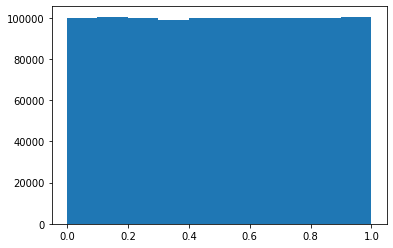

In [8]:
# uniform distribution with for-loop
from matplotlib import pyplot as plt

hist = []
for _ in range(1000000):
  hist.append(random.random())

plt.hist(hist)
plt.show()

* Other modules provide random number generators: for example `numpy.random` 
    * e.g. allows to throw random numbers from a standard normal distribution.

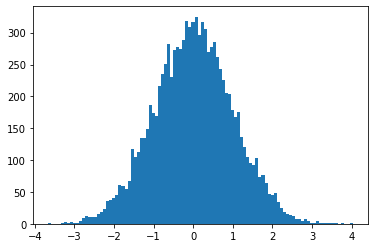

In [10]:
# normal distribution with for-loop
# same seed same distribution
from numpy.random import normal, seed

seed(1)
hist = []
for _ in range(10000):
  hist.append(normal())

plt.hist(hist, bins=100)
plt.show()

### Examples of Monte Carlo Simulation

#### Measure probability to get two kings drawing randomly two cards from a deck.


* Frequentist approach: $\textrm{probability of event} = \cfrac{\textrm{n. successes}}{\textrm{n. experiments}}$


$$P_\textrm{two kings} = \frac{4}{40} \cdot \frac{3}{39} = \frac{1}{130} \approx 0.007692$$

* Let's now try with a Monte Carlo simulation.

In [13]:
# card example as function
from random import sample, seed

deck = ['A', 'K', 'Q', 'J', '7', '6', '5', '4', '3', '2'] * 4

seed(1)
trials = 10000
successes = 0
for t in range(trials):
    draw = sample(deck, 2)
    if draw == ['K', 'K']:
      successes += 1
    if t < 10:
      print (draw)

print (successes/trials)

['3', '5']
['7', '5']
['4', 'K']
['3', 'A']
['7', 'J']
['5', 'K']
['K', '7']
['4', '3']
['A', '3']
['4', '7']
0.007


#### Determine $\pi$

* We know what to expect: $\pi\approx 3.141592653589793\ldots$. 

* Consider a circle of radius $r$ inscribed in a square with side length $2r$. 

<img src="https://drive.google.com/uc?id=1wHp9w5Ln1E-TsrYFgxfJXe1dTnyrTPVT" width=300>

* The ratio of the areas of circle and square is

$$R = \cfrac{\textrm{Area Circle}}{\textrm{Area Square}} = \cfrac{\pi r^2}{4r^2} = \cfrac{\pi}{4} $$

* Select 2 random numbers, $x_1$ and $x_2$, from the interval $[-r,r]$;
* determine if the point $(x_1, x_2)$ lies within the circle (check if $\sqrt{x_1^2 + x_2^2} \leq r$);
* keeping track of the total number of points within the circle and the number of generated points;
* compute $R = \cfrac{\textrm{n. points in circle}}{\textrm{n. generated points}}$;
* $\pi = R \cdot 4$.

In [17]:
# area example as function
from random import random, seed
from math import sqrt

seed(1)

def simulate(trials):
  r = 1
  in_circle = 0.0
  for t in range(trials):
    x1 = -r + random()*2*r
    x2 = -r + random()*2*r
    distance = sqrt(x1**2 + x2**2)
    if distance <= r:
      in_circle += 1
  return in_circle

trials = 10000  
print (simulate(trials)/trials*4)


3.116


* The lower is the probability of a successful experiment the higher has to be the number of simulations (imagine the same experiment of the cards but requiring 4 consecutive kings: $P=10^{-5}$):
    * result precision depends on the number of "successes";
    * if the probability is small, we need to try many times (if I run less than 100000 simulation it is highly probable that I get no successes in the case of four K);
    * this is apparent playing with the number of trials in the above simulation.
    
    
* Monte Carlo Simulation is not always the best approach to follow !

In [18]:
# area example using various trials
from random import random, seed
from math import sqrt
import numpy as np

seed(1)
trials=[100, 1000, 10000, 100000, 1000000]

for t in trials:
  print (simulate(t)/t*4)


3.12
3.096
3.1212
3.13956
3.142136


![](https://drive.google.com/uc?id=1lmPeE_aNrG6n1B5LCPi5gWcZiOwIAkBt)

## Accuracy of Monte Carlo Simulations

* Assume you don't know the probability of getting two consecutive K from a deck:
    * what can be concluded from the result of a single MC experiment ?

In [19]:
# rerun deck example with seed 97
from random import sample, seed
deck = ['A', 'K', 'Q', 'J', '7', '6', '5', '4', '3', '2'] * 4

seed(97)
trials = 10000
def sim(trials):
  successes = 0
  for t in range(trials):
      draw = sample(deck, 2)
      if draw == ['K', 'K']:
        successes += 1
  return successes

print (sim(trials)/trials)

0.0084


* Central Limit Theorem states: if $Y_1, Y_2,\dots, Y_n$ are $n$ random samples from a distribution $Y$ with true mean $\mu$ and variance $\sigma^{2}$, then when $n$ is sufficiently large, 

$$ \mu_n = \cfrac{1}{n}\sum_i^n Y_i $$

has approximately a normal distribution $\mathcal{N}(\mu, \sigma^2/n)$. 

* **This means that if ones repeates a MC experiment (changing the seed of the random number generator) she should obtain results normally distributed around the *true* value $\mu$.**

In [20]:
# run deck example 1000 times
# compute meand and std
import numpy as np
from random import sample, seed

res = []
experiments = 1000
for e in range(experiments):
  seed(e)
  res.append(sim(10000)/10000)



In [21]:
print (np.mean(res))
print (np.std(res))

0.0076885
0.0008707799664668452


<img src="https://drive.google.com/uc?id=1HZZA6cYl9-dG2wtYng3KqyogceLp1f_p" width="500">

* Hence:
$$\mu_n - \mu \approx \mathcal{N}(0, \sigma^2/n) $$

* So considering one single Monte Carlo experiment we can define an interval so that there is a certain probability to find $\mu$ in there.

$$ P\left(\mu_n - 1.96\sigma\le \mu \le \mu_n + 1.96\sigma\right) = 0.95$$

<img src="https://drive.google.com/uc?id=18stWjXRiHr0NbRcwxD2Rq_KU3TjwnXRO">

* This interval is called **95% confidence interval** because the pink area covers 95% of the total area under the Gaussian.
    * if you repeat many times the above simulation, the fraction of calculated confidence intervals that contains the true parameter $\mu$ would tend toward 95%.


* The most common intervals are 99% and 95% confidence levels and are respectively defined as $\pm \cfrac{2.57\sigma}{\sqrt{n}}$ and $\pm \cfrac{1.96\sigma}{\sqrt{n}}$. 
    

* The confidence interval can be used to assess the accuracy of the Monte Carlo simulation:
    * the root mean squared error on our best estimate of $\mu$ is

$$ \mathrm{RMSE}(\mu_n) = \sqrt{\mathbb{E}[(\mu_n - \mu )^2]} = \sqrt{\cfrac{\sigma^2}{n}}=\cfrac{\sigma}{\sqrt{n}} $$
where $\sigma^2 = \mathrm{Var}(Y)$.

* to get one more decimal digit of accuracy is like asking for an RMSE one tenth as large, and that requires a 100-fold increase in computation. 
* to get three more digits of accuracy requires one million times as much computation. 

#### Advantages
* Strong way of estimating uncertainty;
* simple & intuitive, this approach is quite easy to understand.

#### Disadvantages
* Computationally inefficient — when you have a large amount of variables bounded to different constraints, it requires a lot of time and a lot of computations to approximate a solution using this method;
* if poor parameters and constraints are input into the model then poor results will be given as outputs.

## Stochastic Processes

* If a system evolves according to a *deterministic* process, all data necessary to predict its development with 100% certainty is available.


* Unfortunately real life processes usually are *noisy*, exhibits behaviours that cannot be described by a deterministic model
    * necessary to switch to *stochastic processes* to model the uncertainty.


* A *stochastic or random process* is a collection of random variables indexed by some set (usually time)
    * each random variable of the stochastic process is uniquely associated with an element in the set (e.g. a time). 

![](https://drive.google.com/uc?id=1FDGbEvG-7qUqctzxcqFtzD4E7b3UO-I_)


* Stochastic processes are described by *stochastic differential equation* (SDE):

$$dX ( t ) = \underbrace{\mu ( t, X ( t )) dt}_{\textrm{deterministic}} + \underbrace{\sigma ( t, X ( t )) dW ( t )}_{\textrm{stochastic}}$$ 

* where $dW$ represent the increments of a Wiener process or elementary Brownian motion
   
$$dW = Z \sqrt{dt} \qquad (Z ∼ \mathcal{N}( 0, 1 ))$$

* The mean of $dW$ is zero and its variance is $dt$
    * the standard deviation grows with the square root of time: $W(t) ∼ \mathcal{N}( 0, t )$ because each $dW$ is distributed like independent standard Gaussian. 

<img src="https://drive.google.com/uc?id=1Omk5jlz0xT_ltMGWomZ1GW2kTOdQCKmU"> 




## Simulating Stochastic Differential Equations

* Euler scheme is the most used method to simulate SDEs.


* Consider an SDE of the form

$$dX ( t ) = \mu ( t, X ( t )) dt + \sigma ( t, X ( t )) dW ( t )$$


* The simulation of $X(t)$ is done as follows:
  * consider the value of $X$ at time $t_i$;
  * compute the value at $t_{i+1}$ using the given SDE, setting a $\Delta t$, and sampling from a standard normal $Z_i$

$$X ( t_{i+1} ) = X ( t_i ) + \mu ( t_i , X ( t_i )) \Delta t + \sigma ( t_i , X ( t_i)) \sqrt{\Delta t} Z_{i}$$



* If drift $\mu$ and diffusion coefficient $\sigma$ are constant (i.e. deterministic and independent of both the time $t$ and the variable $X$), the process $X ( t )$ is called an arithmetic Brownian motion

$$dX ( t ) = \mu dt + \sigma dW (t) = \mu dt + \sigma \sqrt{t}\mathcal{N}(0,1)$$


* thus $X(t) ∼ \mathcal{N} ( \mu t, \sigma^2 t )$.


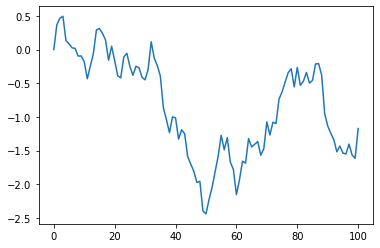

In [24]:
# simulation of ABM process
from matplotlib import pyplot as plt
from numpy.random import normal, seed
import numpy as np

seed(3)
X0 = 0
X = [X0]
mu = 0.01
sigma = 0.2
dt = 1
for i in range(100):
  X.append(X[-1] + mu*dt + sigma*sqrt(dt)*normal())


plt.plot(X)
plt.show()

* Arithmetic Brownian motion can take negative values so it is unsuitable for simulating asset prices: 
    * use Geometric Brownian Motion (GBM) instead.

### Geometric Brownian Motion

* Stock prices deviate from a steady state as a result of the random fluctuations given by the trades. 


* Consider the stock price $S_t$ (i.e. $S(t)$) with an expected rate of return $\mu$, then the price relative change in a period $dt$ can be decomposed into two parts:
    * **deterministic**, the expected return from the stock hold during the time period $dt$ ($\mu S_tdt$)
    * **stochastic** which reflects the random changes of the market (e.g. as a response to external effects such as unexpected news). A reasonable assumption is to take this contribution proportional to the stock ($\sigma S_tdW_t$ where $dW_t$ is a Wiener process).


* The resulting SDE is:

$$dS_t = \mu S_tdt + \sigma S_tdW_t$$
or
$$\frac{dS_t}{S_t} = d\textrm{log}(S_t) = \mu dt + \sigma dW_t$$

* The solution of this SDE can be derived by applying the It$\hat{o}$'s formula (full derivation in the notes).

$$S_t = S_{t-1}e^{\big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma Z\sqrt{dt}}$$

* the change in $\textrm{log} S_t$ has a constant *drift* $\mu - \frac{1}{2}\sigma^2$ and a constance variance rate $\sigma^2$ (remember that $Z=\mathcal{N}(0,1)$) 
    * therefore $\textrm{log} S_t$ at some time $T$ is normally distributed with:


$$\textrm{log}\left(\cfrac{S_t}{S_{t-1}}\right) = \left(\mu - \frac{1}{2}\sigma^2\right)dt + \sigma Z\sqrt{dt} \approx\mathcal{N}\left[\left(\mu-\frac{\sigma^2}{2}\right)T, \sigma^2 T\right]$$


* **A variable whose logarithm is normally distributed is said to be log-normal**; 
    * lognormality is important because ensures a stock price will never be negative.


* Looking at the initial $dS$ equation we had that:

$$dS_t = \mu S_tdt + \sigma S_tdB_t$$

* which shows that the closer is $S_t$ to 0 the smaller is the $dS$ variation (so it will never go below 0).

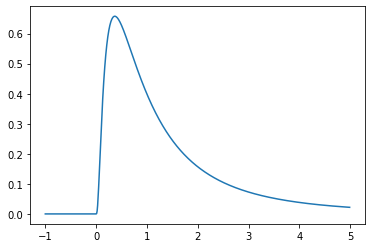

In [ ]:
# plot lognorm distribution
from matplotlib import pyplot as plt
from scipy.stats import lognorm
import numpy as np

x = np.arange(-1, 5, 0.01)
l = lognorm(1)

plt.plot(x, l.pdf(x))
plt.show()

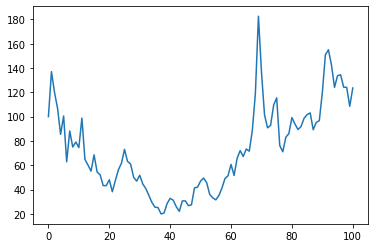

In [27]:
# stock price evolution
from numpy.random import normal, seed
from math import exp, sqrt

seed(1)
S0 = 100
S = [S0]
mu = 0.01
sigma = 0.2
dt = 1
for i in range(100):
  S.append(S[-1]*exp((mu-sigma**2/2)*dt + sigma*sqrt(dt)*normal()))


plt.plot(S)
plt.show()